In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
pd.set_option('display.max_columns', None)

In [69]:
df = pd.read_csv('../data/flats_outlier_treated.csv')

In [70]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,extra_rooms,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,furnishing_type,luxury_score
0,maa bhagwati residency,0.45,sector 7,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,0,4,West,Relatively New,NaN,NaN,900.0,0,28
1,apna enclave,0.50,sector 3,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,0,1,West,Old Property,NaN,NaN,650.0,2,37
2,tulsiani easy in homes,0.40,sohna road,6723.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,0,12,NaN,New Property,NaN,NaN,595.0,0,36
3,smart world orchard,1.47,sector 61,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,1,2,NaN,Under Construction,NaN,NaN,1200.0,0,76
4,parkwood westend,0.70,sector 92,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,1,5,NaN,Under Construction,1345.0,NaN,NaN,0,0


In [71]:
df.shape

(2849, 18)

In [72]:
df.isnull().sum()

society                   0
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
extra_rooms               0
floorNum                  0
facing                  805
agePossession             0
super_built_up_area     956
built_up_area          1955
carpet_area            1118
furnishing_type           0
luxury_score              0
dtype: int64

Built Up Area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

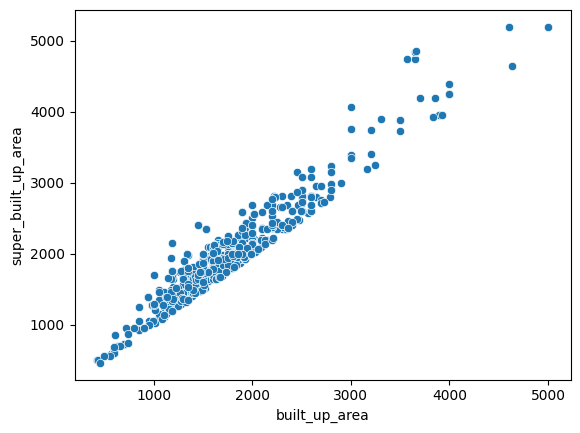

In [73]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

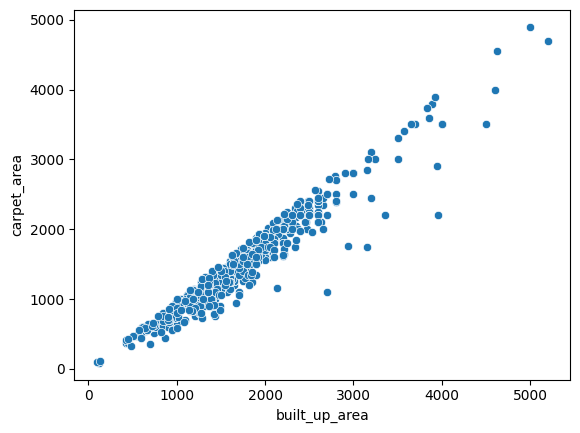

In [74]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [75]:
# no of rows where all 3 are NaN
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).sum()


np.int64(0)

Comment: No row is there where all three are NaN

In [76]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [77]:
# no of rows where all 3 are present
all_present_df.shape

(534, 18)

In [78]:
# calculating (super_built_up_area/built_up_area) and (carpet_area/built_up_area) to fill NaN
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()


In [79]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1052289815447711 0.9


In [80]:
# built up area NaN but both super built up area present and carpet area present
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [81]:
sbc_df.shape

(424, 18)

In [82]:
# Taking avg of super_built_up area and carpet_area in those cases
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/tmp/ipykernel_5417/4233832945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
/tmp/ipykernel_5417/4233832945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_bu

In [83]:
df.update(sbc_df)

In [84]:
df.isnull().sum()

society                   0
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
extra_rooms               0
floorNum                  0
facing                  805
agePossession             0
super_built_up_area     956
built_up_area          1531
carpet_area            1118
furnishing_type           0
luxury_score              0
dtype: int64

In [85]:
# built up area NaN but only super_built_up_area area present
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [86]:
sb_df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,extra_rooms,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,furnishing_type,luxury_score
4,parkwood westend,0.70,sector 92,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,1,5,NaN,Under Construction,1345.0,NaN,NaN,0,0
6,the cocoon,2.00,dwarka expressway,13333.0,1500.0,Super Built up area 1500(139.35 sq.m.),3,3,3,0,5,NaN,New Property,1500.0,NaN,NaN,0,0
13,godrej,0.95,sector 33,6859.0,1385.0,Super Built up area 1385(128.67 sq.m.),2,2,3+,0,3,South-East,Under Construction,1385.0,NaN,NaN,0,0
14,shree vardhman flora,0.70,sector 90,5385.0,1300.0,Super Built up area 1300(120.77 sq.m.),2,2,3,1,13,NaN,New Property,1300.0,NaN,NaN,0,15
18,central park flower valley,2.20,sector 33,10476.0,2100.0,Super Built up area 2100(195.1 sq.m.),3,3,3,1,12,North-East,New Property,2100.0,NaN,NaN,2,49


In [87]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/tmp/ipykernel_5417/1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
/tmp/ipykernel_5417/1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [88]:
df.update(sb_df)

In [89]:
df.isnull().sum()

society                   0
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
extra_rooms               0
floorNum                  0
facing                  805
agePossession             0
super_built_up_area     956
built_up_area           645
carpet_area            1118
furnishing_type           0
luxury_score              0
dtype: int64

In [90]:
# built up area NaN but only carpet area present
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]


In [91]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/tmp/ipykernel_5417/2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
/tmp/ipykernel_5417/2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [92]:
df.update(c_df)

In [93]:
df.isnull().sum()

society                   0
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
extra_rooms               0
floorNum                  0
facing                  805
agePossession             0
super_built_up_area     956
built_up_area             0
carpet_area            1118
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

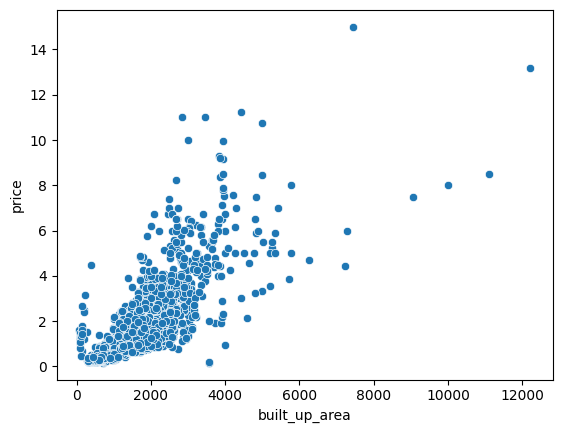

In [94]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [95]:
df.columns

Index(['society', 'price', 'sector', 'price_per_sqft', 'area', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'extra_rooms', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [96]:
df[((df['area']/df['built_up_area']) >= 1.5) & (df['built_up_area'] < 600)][['area', 'built_up_area', 'carpet_area', 'super_built_up_area', 'bedRoom', 'bathroom', 'balcony', 'extra_rooms', 'price']]

,area,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,extra_rooms,price
29,594.0,73.00,66.00,NaN,2,2,2,0,1.60
104,958.0,81.00,NaN,89.0,2,2,3,0,1.10
131,1935.0,195.00,NaN,215.0,3,3,2,0,2.50
157,926.0,118.00,86.00,NaN,3,2,3+,1,1.45
182,1370.0,141.00,127.30,NaN,3,3,3,0,1.80
263,1260.0,140.00,NaN,NaN,3,3,2,0,0.70
296,990.0,97.00,92.00,NaN,2,2,1,0,1.05
412,1944.0,195.00,NaN,216.0,3,3,2,1,2.40
1902,820.0,85.00,76.44,NaN,2,2,2,0,1.31
1914,1167.0,120.00,108.40,NaN,2,2,1,1,1.15


Comments: These rows very less built up area which is unrealistic. So, Replace these rows built_up_area by area

In [97]:

anamoly_df = df[((df['area']/df['built_up_area']) >= 1.5) & (df['built_up_area'] < 600)]

In [98]:
anamoly_df[['area', 'built_up_area', 'carpet_area', 'super_built_up_area', 'bedRoom', 'bathroom', 'balcony', 'extra_rooms', 'price']]

,area,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,extra_rooms,price
29,594.0,73.00,66.00,NaN,2,2,2,0,1.60
104,958.0,81.00,NaN,89.0,2,2,3,0,1.10
131,1935.0,195.00,NaN,215.0,3,3,2,0,2.50
157,926.0,118.00,86.00,NaN,3,2,3+,1,1.45
182,1370.0,141.00,127.30,NaN,3,3,3,0,1.80
263,1260.0,140.00,NaN,NaN,3,3,2,0,0.70
296,990.0,97.00,92.00,NaN,2,2,1,0,1.05
412,1944.0,195.00,NaN,216.0,3,3,2,1,2.40
1902,820.0,85.00,76.44,NaN,2,2,2,0,1.31
1914,1167.0,120.00,108.40,NaN,2,2,1,1,1.15


In [99]:
anamoly_df['built_up_area'] = anamoly_df['area']

/tmp/ipykernel_5417/4230953930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anamoly_df['built_up_area'] = anamoly_df['area']


In [100]:
anamoly_df[['area', 'built_up_area', 'carpet_area', 'super_built_up_area', 'bedRoom', 'bathroom', 'balcony', 'extra_rooms', 'price']]

,area,built_up_area,carpet_area,super_built_up_area,bedRoom,bathroom,balcony,extra_rooms,price
29,594.0,594.0,66.00,NaN,2,2,2,0,1.60
104,958.0,958.0,NaN,89.0,2,2,3,0,1.10
131,1935.0,1935.0,NaN,215.0,3,3,2,0,2.50
157,926.0,926.0,86.00,NaN,3,2,3+,1,1.45
182,1370.0,1370.0,127.30,NaN,3,3,3,0,1.80
263,1260.0,1260.0,NaN,NaN,3,3,2,0,0.70
296,990.0,990.0,92.00,NaN,2,2,1,0,1.05
412,1944.0,1944.0,NaN,216.0,3,3,2,1,2.40
1902,820.0,820.0,76.44,NaN,2,2,2,0,1.31
1914,1167.0,1167.0,108.40,NaN,2,2,1,1,1.15


In [101]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

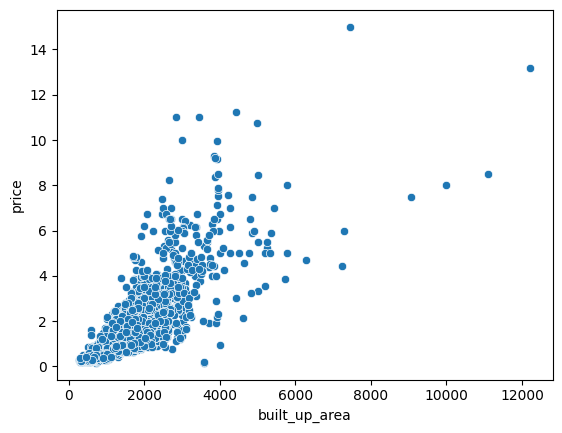

In [102]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

In [103]:
df.columns

Index(['society', 'price', 'sector', 'price_per_sqft', 'area', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'extra_rooms', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [104]:
# Drop area, areaWithType, super_built_up_area, carpet_area columns
df.drop(columns=['area', 'areaWithType', 'super_built_up_area', 'carpet_area'], inplace=True)

In [105]:
df.columns

Index(['society', 'price', 'sector', 'price_per_sqft', 'bedRoom', 'bathroom',
       'balcony', 'extra_rooms', 'floorNum', 'facing', 'agePossession',
       'built_up_area', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [106]:
df.isnull().sum()

society              0
price                0
sector               0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
extra_rooms          0
floorNum             0
facing             805
agePossession        0
built_up_area        0
furnishing_type      0
luxury_score         0
dtype: int64

floorNum

In [107]:
df['floorNum'].isnull().sum()

np.int64(0)

In [108]:
df['floorNum'].value_counts().sort_index()

floorNum
0     125
1     206
2     243
3     231
4     192
5     163
6     181
7     180
8     196
9     162
10    176
11    111
12    156
13     39
14    109
15     80
16     51
17     47
18     37
19     33
20     25
21     15
22     13
23     14
24     11
25      9
26      5
27      7
28      4
29      3
30      5
31      3
32      2
33      3
34      2
35      2
38      1
39      2
40      1
43      2
44      1
45      1
Name: count, dtype: int64

In [109]:
df.shape

(2849, 14)

facing

In [110]:
df['facing'].isnull().sum()

np.int64(805)

Dropping 'facing' column

In [111]:
df.drop(columns=['facing'],inplace=True)

In [112]:
df.columns

Index(['society', 'price', 'sector', 'price_per_sqft', 'bedRoom', 'bathroom',
       'balcony', 'extra_rooms', 'floorNum', 'agePossession', 'built_up_area',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [113]:
df.isnull().sum()

society            0
price              0
sector             0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
extra_rooms        0
floorNum           0
agePossession      0
built_up_area      0
furnishing_type    0
luxury_score       0
dtype: int64

agePossession

In [114]:
df['agePossession'].value_counts()

agePossession
Relatively New        1441
New Property           492
Moderately Old         347
Under Construction     254
Undefined              185
Old Property           130
Name: count, dtype: int64

Comments: We have to impute the 'undefined' values 

In [115]:
df[df['agePossession'] == 'Undefined'][['sector', 'agePossession']]

,sector,agePossession
5,sector 36,Undefined
15,sector 108,Undefined
16,sector 62,Undefined
24,sector 36,Undefined
25,sector 65,Undefined
...,...,...
2681,sector 4 urban estate,Undefined
2689,sector 65,Undefined
2742,sector 99,Undefined
2743,sector 49,Undefined


In [116]:
# find out the sector of that property, and then in that sector what is the mode 'agePossession' replace with that 
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [117]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [118]:
df['agePossession'].value_counts()

agePossession
Relatively New        1541
New Property           528
Moderately Old         360
Under Construction     268
Old Property           138
Undefined               14
Name: count, dtype: int64

In [119]:
# remove the rows which has still NaN in 'agePossession'
df = df[~(df['agePossession'] == 'Undefined')]

In [120]:
df['agePossession'].value_counts()

agePossession
Relatively New        1541
New Property           528
Moderately Old         360
Under Construction     268
Old Property           138
Name: count, dtype: int64

In [121]:
df.shape

(2835, 13)

In [122]:
df.columns

Index(['society', 'price', 'sector', 'price_per_sqft', 'bedRoom', 'bathroom',
       'balcony', 'extra_rooms', 'floorNum', 'agePossession', 'built_up_area',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [123]:
df.isnull().sum()

society            0
price              0
sector             0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
extra_rooms        0
floorNum           0
agePossession      0
built_up_area      0
furnishing_type    0
luxury_score       0
dtype: int64

In [124]:
df.duplicated().sum()

np.int64(3)

In [125]:
df.drop_duplicates(keep='first', inplace=True)

In [126]:
df.duplicated().sum()

np.int64(0)

In [127]:
df[['price', 'built_up_area', 'price_per_sqft']]

,price,built_up_area,price_per_sqft
0,0.45,1000.0,5000.0
1,0.50,722.0,7692.0
2,0.40,661.0,6723.0
3,1.47,1333.0,12250.0
4,0.70,1217.0,5204.0
...,...,...,...
2844,1.05,1715.0,5541.0
2845,3.30,3305.0,9985.0
2846,0.95,1649.0,5214.0
2847,5.80,3700.0,12500.0


Comment: Since area column has been removed, we need to recalculate price_per_sqft column by price/built_up_area

In [128]:
df['price_per_sqft'] = ((df['price'] * 10000000) / df['built_up_area'])

In [129]:
df[['price', 'built_up_area', 'price_per_sqft']]

,price,built_up_area,price_per_sqft
0,0.45,1000.0,4500.000000
1,0.50,722.0,6925.207756
2,0.40,661.0,6051.437216
3,1.47,1333.0,11027.756939
4,0.70,1217.0,5751.848809
...,...,...,...
2844,1.05,1715.0,6122.448980
2845,3.30,3305.0,9984.871407
2846,0.95,1649.0,5761.067314
2847,5.80,3700.0,15675.675676


In [130]:
df['price_per_sqft'].value_counts().sort_index()

price_per_sqft
476.323900      1
532.362006      1
2266.288952     1
2375.000000     1
2691.790040     1
               ..
31003.382187    1
31939.605110    1
32514.450867    1
33333.333333    1
38924.274593    1
Name: count, Length: 2469, dtype: int64

In [131]:
df.to_csv('../data/flats_missing_value_imputation.csv',index=False)